In [ ]:
# pip install dask

In [ ]:
# pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 136 kB 5.1 MB/s 


In [ ]:
# pip install hvplot

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
import os
from PIL import Image
import cv2



import imageio
from dask import bag, diagnostics 
import hvplot.pandas
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
from bokeh.plotting import show
import holoviews as hv

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Training and Validation datasets
data_dict = '/content/gdrive/MyDrive/Deep_Learning_Project' 
print(os.listdir(data_dict))

['archive.zip', 'Deep_Learning_Project', 'tester_data', 'Training', 'Validation', 'Scripts', 'DL Notes.gdoc']


In [ ]:
train_path = data_dict + "/Training"
validation_path =  data_dict + "/Validation"

train_male = data_dict + "/Training/male"
train_female = data_dict + "/Training/female"

validation_male = data_dict + "/Validation/male"
validation_female = data_dict + "/Validation/female"

## Bar plot for each Gender Class

[23243, 23766]


Text(0.5, 1.0, 'Gender Category of Train Set')

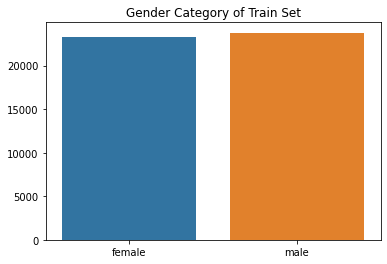

In [ ]:
# classes in training
category_names = os.listdir(train_path)
num_category_names =len(category_names)

# count of images for each class in training
train_images = []
for category in category_names:
    folder = train_path +"/"+ category
    train_images.append(len(os.listdir(folder)))

print(train_images)

train_plot = sns.barplot(x=category_names,y=train_images)
train_plot.set_title("Gender Category of Train Set")


[23243, 23766]


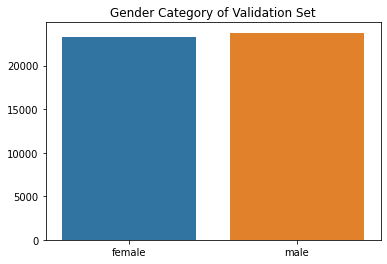

In [ ]:
# classes in validation
category_names = os.listdir(validation_path)
num_category_names =len(category_names)

# count of images for each class in validation
validation_images = []
for category in category_names:
    folder = train_path +"/"+ category
    validation_images.append(len(os.listdir(folder)))

print(validation_images)

validation_plot = sns.barplot(x=category_names,y=validation_images)
validation_plot.set_title("Gender Category of Validation Set");

## Show image examples

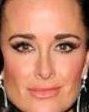

In [ ]:
# female image example
Image.open(train_female + "/202598.jpg.jpg")

In [ ]:
# Width and hight of the image
female_image = Image.open(train_female + "/202598.jpg.jpg")
print(female_image.size) 

(89, 112)


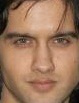

In [ ]:
# male image example
Image.open(train_male + "/193856.jpg.jpg")

## Experiment

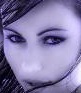

In [ ]:
# outlier? too much purple in the image?
Image.open(train_female + "/202037.jpg.jpg")

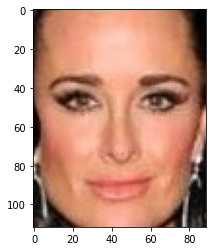

In [ ]:
#cv2 method
import cv2
img_array = cv2.imread(train_female + "/202598.jpg.jpg")
rbg_img= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
#rbg_img
#img_array
plt.imshow(rbg_img)

## Image Color Analyzer
Ref: https://analyticsindiamag.com/guide-to-image-color-analyzer-in-python/

### imageio method

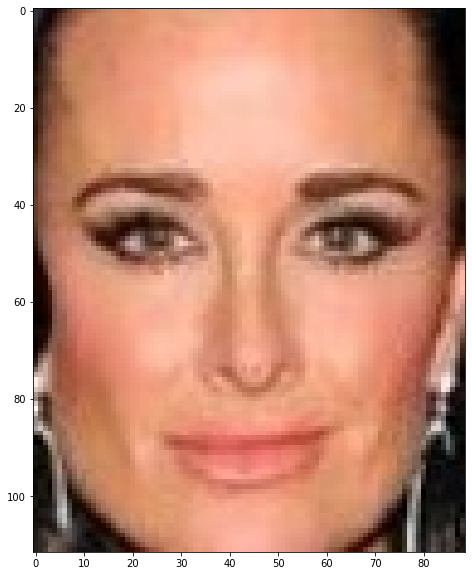

In [ ]:
import imageio
pic=imageio.imread(train_female + "/202598.jpg.jpg")
plt.figure(figsize=(10,10))
plt.imshow(pic)

In [ ]:
print('Type of the image : ',type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Hight of the image {}'.format(pic.shape[0]))
print('Width of the image {}'.format(pic.shape[1]))
print('Dimension of the Image {}'.format(pic.ndim)) 

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (112, 89, 3)
Hight of the image 112
Width of the image 89
Dimension of the Image 3


In [ ]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 29904
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [ ]:
pic[100, 50 ]

Array([239, 156, 126], dtype=uint8)

In [ ]:
print('Value of only R channel {}'.format(pic[50, 50, 0]))
print('Value of only G channel {}'.format(pic[50, 50, 1]))
print('Value of only B channel {}'.format(pic[50, 50, 2]))

Value of only R channel 214
Value of only G channel 144
Value of only B channel 118


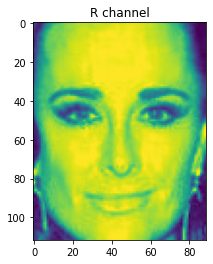

In [ ]:
import matplotlib.pyplot as plt

# red channel
plt.title('R channel')
plt.imshow(pic[ : , : , 0])
plt.show() 

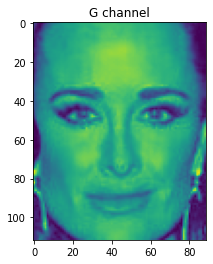

In [ ]:
#Green channel

plt.title('G channel')
plt.imshow(pic[ : , : , 1])
plt.show()

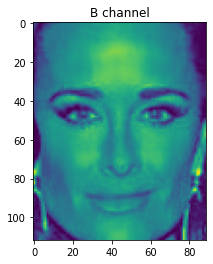

In [ ]:
# Blue Channel

plt.title('B channel')
plt.imshow(pic[ : , : , 2])
plt.show() 

### cv2 method

In [ ]:
import cv2
image = cv2.imread(train_female + "/202598.jpg.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 

NameError: ignored

In [ ]:
print("The type of image is {}".format(type(image)))
print("Shape of the image: {}".format(image.shape)) 

The type of image is <class 'numpy.ndarray'>
Shape of the image: (112, 89, 3)


### Color analysis of the image:

In [ ]:
#Defining a function to extract the hex value of colors present in the image.
def RGB_HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2])) 

In [ ]:
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter

# In the next function, we are Using Kmeans clusters to arrange the colors in different clusters. 
# The algorithm of Kmeans requires a flattened array as input, which is why we are required 
# to flatten the NumPy array into an array of 1 row, three columns. 
# And using the counter to sort colors RGB value.
def get_colors(image, number_of_colors, show_chart):
     reshaped_image = cv2.resize(image, (600, 400))
     reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(reshaped_image)
     counts = Counter(labels)
     counts = dict(sorted(counts.items()))
     center_colors = clf.cluster_centers_
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]
     if (show_chart):
         plt.figure(figsize = (8, 6))
         plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
     return rgb_colors 

[array([79.41656748, 49.07728319, 36.38006824]),
 array([222.6948539 , 147.02521769, 116.34785931]),
 array([250.62334843, 187.02551277, 163.55942494]),
 array([165.42325265, 106.53378487,  83.61353799]),
 array([26.56434599, 15.13407728, 10.61636687]),
 array([239.6739532 , 164.85717185, 135.30798271]),
 array([126.42333923,  80.92820157,  62.86821167]),
 array([198.67989845, 127.71761035,  98.65141618])]

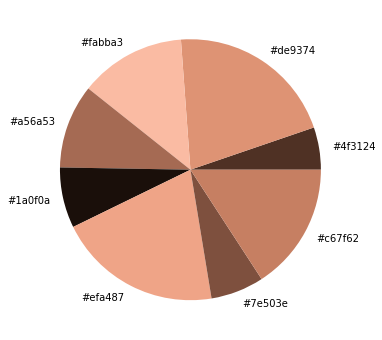

In [ ]:
# Finally, we apply our functions to our images to know about the hex value of the colours presented in the image.
get_colors(image, 8, True)


From the output, we can see the arranged array of RGB values of colors presented in the image provided to openCV and in the pie chart, we see the hex value of 8 most occurred colors in the image. Thus, by this chart, we can analyze the colours presented in the image. 

There are many shades of any color available, so it is very difficult to discrete color names in an image. So we prefer to use hex values to represent the shade of color. In this article, we have seen some basic information extraction of any image data, and we picked up 8 most occurring colors from the image with their hex identity.

## Histogram of image sizes

In [ ]:
import numpy as np
import os

def ResSampleFiles(dirname, N):
    """pick N files from directory"""

    sampled_files = list()
    k = 0
    for item in os.scandir(dirname):
        if item.is_dir():
            continue
        full_path = os.path.join(dirname, item.name)
        if k < N:
            sampled_files.append(full_path)
        else:
            idx = np.random.randint(0, k+1)
            if (idx < N):
                sampled_files[idx] = full_path
        k += 1

    return sampled_files

In [ ]:
# get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return file, h,w

In [ ]:
def find_outliers(img):
    q1, median, q3 = np.percentile(img, [25, 50, 75])
    mean = np.mean(img)
    iqr = q3 - q1
    lower = q1 - (3 * iqr) #1.5 * iqr?
    upper =  q3 + (3 * iqr) #1.5 * iqr?
    print("lower boundary is ", lower)
    print("upper boundary is ", upper)
    print("median is ", median)
    print("mean is ", mean)

### Check image sizes for trainining male images

In [ ]:
#should be around 7922 #try smaller size, e.g. 100
filelist = ResSampleFiles(train_male, int(train_images[1]/3)) 

In [ ]:
#from dask import bag, diagnostics 
# parallelize

dimsbag = bag.from_sequence(filelist).map(get_dims)

with diagnostics.ProgressBar():
    dims = dimsbag.compute()

dim_df = pd.DataFrame(dims, columns=['file', 'height', 'width'])

[########################################] | 100% Completed | 55.5s


In [ ]:
dim_df

,file,height,width
0,/content/gdrive/MyDrive/Deep_Learning_Project/...,97,81
1,/content/gdrive/MyDrive/Deep_Learning_Project/...,92,73
2,/content/gdrive/MyDrive/Deep_Learning_Project/...,104,79
3,/content/gdrive/MyDrive/Deep_Learning_Project/...,113,89
4,/content/gdrive/MyDrive/Deep_Learning_Project/...,100,79
...,...,...,...
7917,/content/gdrive/MyDrive/Deep_Learning_Project/...,119,94
7918,/content/gdrive/MyDrive/Deep_Learning_Project/...,107,87
7919,/content/gdrive/MyDrive/Deep_Learning_Project/...,109,91
7920,/content/gdrive/MyDrive/Deep_Learning_Project/...,89,70


lower boundary is  78.0
upper boundary is  134.0
median is  106.0
mean is  106.05516283766725


Text(0.5, 1.0, 'Male Image Size Distribution for Height')

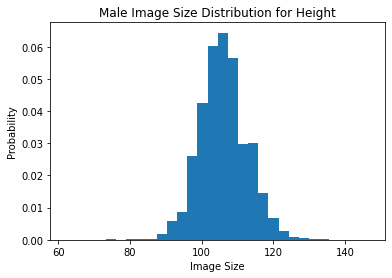

In [ ]:
# find the lower and upper boundary of height
find_outliers(dim_df['height'])
plt.hist(dim_df['height'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Image Size');
plt.title('Male Image Size Distribution for Height')

lower boundary is  58.0
upper boundary is  107.0
median is  83.0
mean is  82.69060843221409


Text(0.5, 1.0, 'Male Image Size Distribution for Width')

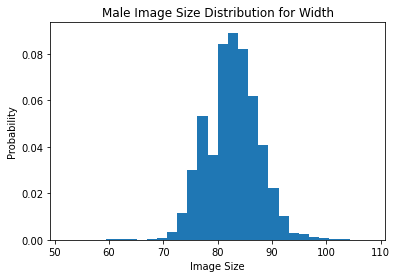

In [ ]:
# find the lower and upper boundary of width
find_outliers(dim_df['width'])

plt.hist(dim_df['width'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Image Size');
plt.title('Male Image Size Distribution for Width')

In [ ]:
#import hvplot.pandas  # custom install

sizes = dim_df.groupby(['height', 'width']).size().reset_index()\
              .rename(columns={0:'count'})
plot = sizes.hvplot.scatter(x='height', y='width', size='count', 
                      title = 'Scatterplot for Height and Width of Male Images',
                      xlim=(0,200), ylim=(0,200), grid=True, 
                      xticks=2, yticks=2, 
                      height=500, width=600)\
                      .options(scaling_factor=0.1, line_alpha=1, fill_alpha=0)

In [ ]:
#from bokeh.plotting import show
#import holoviews as hv

show(hv.render(plot))

### Check image sizes for trainining female images



In [ ]:
# should be 7747 #try smaller size, e.g. 100
filelist = ResSampleFiles(train_female, int(train_images[0]/3)) 

In [ ]:
from dask import bag, diagnostics 
# parallelize

dimsbag = bag.from_sequence(filelist).map(get_dims)

with diagnostics.ProgressBar():
    dims = dimsbag.compute()

dim_df = pd.DataFrame(dims, columns=['file', 'height', 'width'])

[########################################] | 100% Completed | 54.9s


lower boundary is  80.0
upper boundary is  136.0
median is  108.0
mean is  108.04608235445978


Text(0.5, 1.0, 'Female Image Size Distribution for Height')

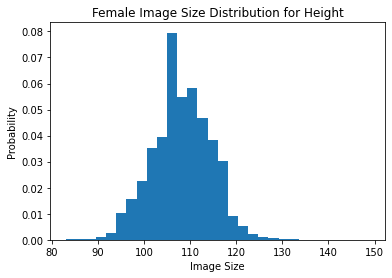

In [ ]:
# find the lower and upper boundary of height
find_outliers(dim_df['height'])
plt.hist(dim_df['height'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Image Size');
plt.title('Female Image Size Distribution for Height')

lower boundary is  62.0
upper boundary is  104.0
median is  83.0
mean is  83.07628759519814


Text(0.5, 1.0, 'Female Image Size Distribution for Width')

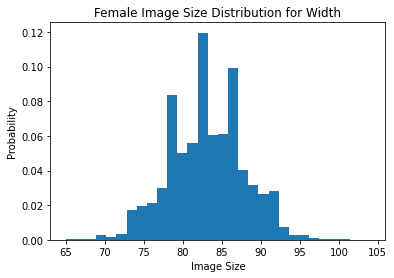

In [ ]:
# find the lower and upper boundary of width
find_outliers(dim_df['width'])

plt.hist(dim_df['width'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Image Size');
plt.title('Female Image Size Distribution for Width')

In [ ]:
sizes = dim_df.groupby(['height', 'width']).size().reset_index()\
              .rename(columns={0:'count'})
plot = sizes.hvplot.scatter(x='height', y='width', size='count', 
                    title = 'Scatterplot for Height and Width of Female Images',
                    xlim=(0,200), ylim=(0,200), grid=True, xticks=2, yticks=2, 
                    height=500, width=600)\
                    .options(scaling_factor=0.1,line_alpha=1, fill_alpha=0)

In [ ]:
show(hv.render(plot))

## Outlier - too dark or too bright

In [ ]:
# Ref: https://stackoverflow.com/questions/57315069/outlier-detection-approach-with-smaller-datasets
# Ref: https://stackoverflow.com/questions/70884141/python-filter-to-remove-outliers-in-image
# Ref: https://stackoverflow.com/questions/11471760/removing-outlier-pixels-from-a-small-binary-image
